## Background
W. Avy likes your analysis, but he wants more information about temperature trends before opening the surf shop. Specifically, he wants temperature data for the months of June and December in Oahu, in order to determine if the surf and ice cream shop business is sustainable year-round.

## Method
* Deliverable 1: Determine the Summary Statistics for June
* Deliverable 2: Determine the Summary Statistics for December
* Deliverable 3: A written report for the statistical analysis (README.md)

In [64]:
# pip install dataframe-image

In [65]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import extract

# import dataframe_image
import dataframe_image as dfi

In [66]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# What are the tables in hawaii.sqlite db
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [40]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract 

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
#june_temps

In [41]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [44]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [54]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
# using describe() method
june_temps_summary_stats = june_temps_df.describe()
june_temps_summary_stats

# export as image
dfi.export(june_temps_summary_stats, "Images/june_temps_summary_stats.png")
june_temps_summary_stats

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<function matplotlib.pyplot.show(close=None, block=None)>

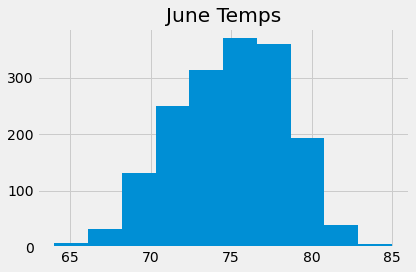

In [71]:
# plot a histogram
june_temps_df.hist()

# save image
plt.savefig("Images/June_temps_hist.png")
plt.tight_layout()

plt.show

## D2: Determine the Summary Statistics for December

In [56]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
#dec_temps

In [57]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
dec_temps_list[:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [59]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [60]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [62]:
# Calculate and print out the summary statistics for the December temperature DataFrame.
dec_temps_summary_stats = dec_temps_df.describe()
dec_temps_summary_stats

# export as image
dfi.export(dec_temps_summary_stats, "Images/dec_temps_summary_stats.png")
dec_temps_summary_stats

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.show(close=None, block=None)>

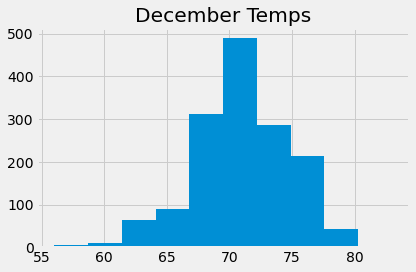

In [72]:
# plot a histogram
dec_temps_df.hist()

# save image
plt.savefig("Images/Dec_temps_hist.png")
plt.tight_layout()

plt.show